### import libraries

In [177]:
import os
import time
import pandas as pd
import numpy as np
import glob
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import f1_score
import seaborn as sb


### Import sample data for exploration

In [108]:
data= pd.read_csv('Data/00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv.gz')

In [109]:
leng= data.columns.to_list()
len(leng)

278

### Get the number of feautures

In [110]:
i = 0
for a in leng:
#     print(a[:5])
    if a[:5]=='label':
        break
    else:
        i+=1
i

226

In [113]:
features  = data.iloc[: , :227]

In [114]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Columns: 227 entries, timestamp to label:LYING_DOWN
dtypes: float64(226), int64(1)
memory usage: 4.0 MB


In [115]:
features.describe()

timestamp  raw_acc:magnitude_stats:mean  \
count  2.287000e+03                   2287.000000   
mean   1.444253e+09                      0.999602   
std    1.590692e+05                      0.015801   
min    1.444079e+09                      0.976320   
25%    1.444116e+09                      0.995094   
50%    1.444175e+09                      0.996954   
75%    1.444380e+09                      1.000210   
max    1.444751e+09                      1.274234   

       raw_acc:magnitude_stats:std  raw_acc:magnitude_stats:moment3  \
count                  2287.000000                      2287.000000   
mean                      0.024709                         0.019451   
std                       0.084795                         0.087645   
min                       0.000955                        -0.278241   
25%                       0.001175                        -0.000534   
50%                       0.001282                         0.000264   
75%                       0.002906                         0.000700   
max                       1.180354                         1.430619   

       raw_acc:magnitude_stats:moment4  raw_acc:magnitude_stats:percentile25  \
count                      2287.000000                           2287.000000   
mean                          0.040479                              0.984296   
std                           0.131457                              0.050099   
min                           0.001236                              0.472272   
25%                           0.001547                              0.993113   
50%                           0.001692                              0.995538   
75%                           0.005376                              0.996693   
max                           1.840096                              1.007394   

       raw_acc:magnitude_stats:percentile50  \
count                           2287.000000   
mean                               0.996875   
std                                0.013747   
min                                0.762243   
25%                                0.994704   
50%                                0.996780   
75%                                0.999723   
max                                1.132724   

       raw_acc:magnitude_stats:percentile75  \
count                           2287.000000   
mean                               1.012116   
std                                0.064761   
min                                0.980864   
25%                                0.996158   
50%                                0.997955   
75%                                1.001175   
max                                1.931401   

       raw_acc:magnitude_stats:value_entropy  \
count                            2287.000000   
mean                                2.260606   
std                                 0.522906   
min                                 0.150662   
25%                                 2.066401   
50%                                 2.506754   
75%                                 2.584732   
max                                 2.862048   

       raw_acc:magnitude_stats:time_entropy  \
count                           2287.000000   
mean                               6.681515   
std                                0.017499   
min                                6.334467   
25%                                6.684608   
50%                                6.684611   
75%                                6.684611   
max                                6.684611   

       raw_acc:magnitude_spectrum:log_energy_band0  \
count                                  2287.000000   
mean                                      5.040042   
std                                       0.019123   
min                                       4.672548   
25%                                       5.043212   
50%                                       5.043388   
75%                                       5.043542   
max                               

### Use label:LYING_DOWN as the first label

In [116]:
lying = features.groupby(['label:LYING_DOWN']).count()

In [117]:
lying

timestamp  raw_acc:magnitude_stats:mean  \
label:LYING_DOWN                                            
0.0                    1462                          1462   
1.0                     657                           657   

                  raw_acc:magnitude_stats:std  \
label:LYING_DOWN                                
0.0                                      1462   
1.0                                       657   

                  raw_acc:magnitude_stats:moment3  \
label:LYING_DOWN                                    
0.0                                          1462   
1.0                                           657   

                  raw_acc:magnitude_stats:moment4  \
label:LYING_DOWN                                    
0.0                                          1462   
1.0                                           657   

                  raw_acc:magnitude_stats:percentile25  \
label:LYING_DOWN                                         
0.0                                               1462   
1.0                                                657   

                  raw_acc:magnitude_stats:percentile50  \
label:LYING_DOWN                                         
0.0                                               1462   
1.0                                                657   

                  raw_acc:magnitude_stats:percentile75  \
label:LYING_DOWN                                         
0.0                                               1462   
1.0                                                657   

                  raw_acc:magnitude_stats:value_entropy  \
label:LYING_DOWN                                          
0.0                                                1462   
1.0                                                 657   

                  raw_acc:magnitude_stats:time_entropy  \
label:LYING_DOWN                                         
0.0                                               1462   
1.0                                                657   

                  raw_acc:magnitude_spectrum:log_energy_band0  \
label:LYING_DOWN                                                
0.0                                                      1462   
1.0                                                       657   

                  raw_acc:magnitude_spectrum:log_energy_band1  \
label:LYING_DOWN                                                
0.0                                                      1462   
1.0                                                       657   

                  raw_acc:magnitude_spectrum:log_energy_band2  \
label:LYING_DOWN                                                
0.0                                                      1462   
1.0                                                       657   

                  raw_acc:magnitude_spectrum:log_energy_band3  \
label:LYING_DOWN                                                
0.0                                                      1462   
1.0                                                       657   

                  raw_acc:magnitude_spectrum:log_energy_band4  \
label:LYING_DOWN                                                
0.0                                                      1462   
1.0                                                       657   

                  raw_acc:magnitude_spectrum:spectral_entropy  \
label:LYING_DOWN                                                
0.0                                                      1462   
1.0                                                       657   

                  raw_acc:magnitude_autocorrelation:period  \
label:LYING_DOWN                                             
0.0                                                   1462   
1.0                                                    657   

                  raw_acc:magnitude_autocorrelation:normalized_ac  \
label:LYING_DOWN                                                    
0.0                         

### Get all users data

In [118]:
dfs = [] # list to hold each user dataframe
for file in os.listdir('Data/'):
   
    # read user csv file to dataframe
    df = pd.read_csv('Data/'+file)
    
    # extract user uuid and add to dataframe
    df['UUID'] = file.split('.')[0]
    # rearrage column to make UUID the first column
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    dfs.append(df)
# combine all 60 user into one dataframe
data = pd.concat(dfs)
data

UUID   timestamp  \
0     00EABED2-271D-49D8-B599-1D4A09240601  1444079161   
1     00EABED2-271D-49D8-B599-1D4A09240601  1444079221   
2     00EABED2-271D-49D8-B599-1D4A09240601  1444079281   
3     00EABED2-271D-49D8-B599-1D4A09240601  1444079341   
4     00EABED2-271D-49D8-B599-1D4A09240601  1444079431   
...                                    ...         ...   
4968  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  1444234779   
4969  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  1444234839   
4970  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  1444234899   
4971  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  1444234959   
4972  FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF  1444235019   

      raw_acc:magnitude_stats:mean  raw_acc:magnitude_stats:std  \
0                         0.996815                     0.003529   
1                         0.996864                     0.004172   
2                         0.996825                     0.003667   
3                         0.996874                     0.003541   
4                         0.997371                     0.037653   
...                            ...                          ...   
4968                      1.007886                     0.009355   
4969                      1.000400                     0.009068   
4970                      1.026223                     0.195112   
4971                      1.123513                     0.273450   
4972                      1.020624                     0.135672   

      raw_acc:magnitude_stats:moment3  raw_acc:magnitude_stats:moment4  \
0                           -0.002786                         0.006496   
1                           -0.003110                         0.007050   
2                            0.003094                         0.006076   
3                            0.000626                         0.006059   
4                            0.043389                         0.102332   
...                               ...                              ...   
4968                         0.012618                         0.030905   
4969                        -0.019631                         0.032762   
4970                         0.255240                         0.379733   
4971                         0.312818                         0.480787   
4972                         0.104091                         0.185868   

      raw_acc:magnitude_stats:percentile25  \
0                                 0.995203   
1                                 0.994957   
2                                 0.994797   
3                                 0.995050   
4                                 0.995548   
...                                    ...   
4968                              1.005121   
4969                              0.998186   
4970                              0.983684   
4971                              0.966631   
4972                              0.915936   

      raw_acc:magnitude_stats:percentile50  \
0                                 0.996825   
1                                 0.996981   
2                                 0.996614   
3                                 0.996907   
4                                 0.996860   
...                                    ...   
4968                              1.008012   
4969                              1.001128   
4970                              1.000173   
4971                              1.051232   
4972                              1.018161   

      raw_acc:magnitude_stats:percentile75  \
0                                 0.998502   
1                                 0.998766   
2                                 0.998704   
3                                 0.998690   
4                                 0.998205   
...                                    ...   
4968                              1.010024   
4969                              1.003113   
4970                              1.030232   
4971                              1.229708   
4972                              1

In [119]:
data.describe()

timestamp  raw_acc:magnitude_stats:mean  \
count  3.773460e+05                 377056.000000   
mean   1.445839e+09                      1.002223   
std    5.907009e+06                      0.079623   
min    1.433537e+09                      0.018148   
25%    1.441438e+09                      0.992556   
50%    1.444974e+09                      1.001258   
75%    1.448696e+09                      1.012745   
max    1.464899e+09                      3.185837   

       raw_acc:magnitude_stats:std  raw_acc:magnitude_stats:moment3  \
count                377056.000000                    377056.000000   
mean                      0.038832                         0.037772   
std                       0.096109                         0.113198   
min                       0.000030                        -0.493806   
25%                       0.001709                        -0.000785   
50%                       0.003265                         0.000772   
75%                       0.021366                         0.009864   
max                       1.936343                         2.472750   

       raw_acc:magnitude_stats:moment4  raw_acc:magnitude_stats:percentile25  \
count                    377056.000000                         377056.000000   
mean                          0.072804                              0.983165   
std                           0.170481                              0.082960   
min                           0.000039                              0.015845   
25%                           0.002328                              0.982671   
50%                           0.005051                              0.995300   
75%                           0.045333                              1.003679   
max                           3.360718                              1.942718   

       raw_acc:magnitude_stats:percentile50  \
count                         377056.000000   
mean                               0.998471   
std                                0.076687   
min                                0.017998   
25%                                0.991248   
50%                                1.000116   
75%                                1.009232   
max                                2.636697   

       raw_acc:magnitude_stats:percentile75  \
count                         377056.000000   
mean                               1.016691   
std                                0.104874   
min                                0.020365   
25%                                0.994859   
50%                                1.003813   
75%                                1.019163   
max                                3.958338   

       raw_acc:magnitude_stats:value_entropy  \
count                          377056.000000   
mean                                2.045331   
std                                 0.616899   
min                                 0.009605   
25%                                 1.671571   
50%                                 2.296398   
75%                                 2.523618   
max                                 2.971272   

       raw_acc:magnitude_stats:time_entropy  \
count                         377056.000000   
mean                               6.680278   
std                                0.021246   
min                                5.460637   
25%                                6.684369   
50%                                6.684606   
75%                                6.684610   
max                                6.684612   

       raw_acc:magnitude_spectrum:log_energy_band0  \
count                                377056.000000   
mean                                      5.039597   
std                                       0.025809   
min                                       4.338109   
25%                                       5.042891   
50%                                       5.043350   
75%                                       5.043574   
max                               

In [128]:
data.isna().sum()

UUID                                    0
timestamp                               0
raw_acc:magnitude_stats:mean          290
raw_acc:magnitude_stats:std           290
raw_acc:magnitude_stats:moment3       290
                                    ...  
label:PHONE_IN_BAG                 284884
label:PHONE_ON_TABLE               214923
label:WITH_CO-WORKERS              265282
label:WITH_FRIENDS                 211932
label_source                            0
Length: 279, dtype: int64

In [129]:
data.dropna()

Empty DataFrame
Columns: [UUID, timestamp, raw_acc:magnitude_stats:mean, raw_acc:magnitude_stats:std, raw_acc:magnitude_stats:moment3, raw_acc:magnitude_stats:moment4, raw_acc:magnitude_stats:percentile25, raw_acc:magnitude_stats:percentile50, raw_acc:magnitude_stats:percentile75, raw_acc:magnitude_stats:value_entropy, raw_acc:magnitude_stats:time_entropy, raw_acc:magnitude_spectrum:log_energy_band0, raw_acc:magnitude_spectrum:log_energy_band1, raw_acc:magnitude_spectrum:log_energy_band2, raw_acc:magnitude_spectrum:log_energy_band3, raw_acc:magnitude_spectrum:log_energy_band4, raw_acc:magnitude_spectrum:spectral_entropy, raw_acc:magnitude_autocorrelation:period, raw_acc:magnitude_autocorrelation:normalized_ac, raw_acc:3d:mean_x, raw_acc:3d:mean_y, raw_acc:3d:mean_z, raw_acc:3d:std_x, raw_acc:3d:std_y, raw_acc:3d:std_z, raw_acc:3d:ro_xy, raw_acc:3d:ro_xz, raw_acc:3d:ro_yz, proc_gyro:magnitude_stats:mean, proc_gyro:magnitude_stats:std, proc_gyro:magnitude_stats:moment3, proc_gyro:magnitude_stats:moment4, proc_gyro:magnitude_stats:percentile25, proc_gyro:magnitude_stats:percentile50, proc_gyro:magnitude_stats:percentile75, proc_gyro:magnitude_stats:value_entropy, proc_gyro:magnitude_stats:time_entropy, proc_gyro:magnitude_spectrum:log_energy_band0, proc_gyro:magnitude_spectrum:log_energy_band1, proc_gyro:magnitude_spectrum:log_energy_band2, proc_gyro:magnitude_spectrum:log_energy_band3, proc_gyro:magnitude_spectrum:log_energy_band4, proc_gyro:magnitude_spectrum:spectral_entropy, proc_gyro:magnitude_autocorrelation:period, proc_gyro:magnitude_autocorrelation:normalized_ac, proc_gyro:3d:mean_x, proc_gyro:3d:mean_y, proc_gyro:3d:mean_z, proc_gyro:3d:std_x, proc_gyro:3d:std_y, proc_gyro:3d:std_z, proc_gyro:3d:ro_xy, proc_gyro:3d:ro_xz, proc_gyro:3d:ro_yz, raw_magnet:magnitude_stats:mean, raw_magnet:magnitude_stats:std, raw_magnet:magnitude_stats:moment3, raw_magnet:magnitude_stats:moment4, raw_magnet:magnitude_stats:percentile25, raw_magnet:magnitude_stats:percentile50, raw_magnet:magnitude_stats:percentile75, raw_magnet:magnitude_stats:value_entropy, raw_magnet:magnitude_stats:time_entropy, raw_magnet:magnitude_spectrum:log_energy_band0, raw_magnet:magnitude_spectrum:log_energy_band1, raw_magnet:magnitude_spectrum:log_energy_band2, raw_magnet:magnitude_spectrum:log_energy_band3, raw_magnet:magnitude_spectrum:log_energy_band4, raw_magnet:magnitude_spectrum:spectral_entropy, raw_magnet:magnitude_autocorrelation:period, raw_magnet:magnitude_autocorrelation:normalized_ac, raw_magnet:3d:mean_x, raw_magnet:3d:mean_y, raw_magnet:3d:mean_z, raw_magnet:3d:std_x, raw_magnet:3d:std_y, raw_magnet:3d:std_z, raw_magnet:3d:ro_xy, raw_magnet:3d:ro_xz, raw_magnet:3d:ro_yz, raw_magnet:avr_cosine_similarity_lag_range0, raw_magnet:avr_cosine_similarity_lag_range1, raw_magnet:avr_cosine_similarity_lag_range2, raw_magnet:avr_cosine_similarity_lag_range3, raw_magnet:avr_cosine_similarity_lag_range4, watch_acceleration:magnitude_stats:mean, watch_acceleration:magnitude_stats:std, watch_acceleration:magnitude_stats:moment3, watch_acceleration:magnitude_stats:moment4, watch_acceleration:magnitude_stats:percentile25, watch_acceleration:magnitude_stats:percentile50, watch_acceleration:magnitude_stats:percentile75, watch_acceleration:magnitude_stats:value_entropy, watch_acceleration:magnitude_stats:time_entropy, watch_acceleration:magnitude_spectrum:log_energy_band0, watch_acceleration:magnitude_spectrum:log_energy_band1, watch_acceleration:magnitude_spectrum:log_energy_band2, watch_acceleration:magnitude_spectrum:log_energy_band3, watch_acceleration:magnitude_spectrum:log_energy_band4, watch_acceleration:magnitude_spectrum:spectral_entropy, ...]
Index: []

##### As shown in the above cell there is a significant population of null values and futher analysis is needed before we can begin cleaning our dataset

#### Get features

In [132]:
features  = data.iloc[: , 1:227]

In [133]:
features

timestamp  raw_acc:magnitude_stats:mean  raw_acc:magnitude_stats:std  \
0     1444079161                      0.996815                     0.003529   
1     1444079221                      0.996864                     0.004172   
2     1444079281                      0.996825                     0.003667   
3     1444079341                      0.996874                     0.003541   
4     1444079431                      0.997371                     0.037653   
...          ...                           ...                          ...   
4968  1444234779                      1.007886                     0.009355   
4969  1444234839                      1.000400                     0.009068   
4970  1444234899                      1.026223                     0.195112   
4971  1444234959                      1.123513                     0.273450   
4972  1444235019                      1.020624                     0.135672   

      raw_acc:magnitude_stats:moment3  raw_acc:magnitude_stats:moment4  \
0                           -0.002786                         0.006496   
1                           -0.003110                         0.007050   
2                            0.003094                         0.006076   
3                            0.000626                         0.006059   
4                            0.043389                         0.102332   
...                               ...                              ...   
4968                         0.012618                         0.030905   
4969                        -0.019631                         0.032762   
4970                         0.255240                         0.379733   
4971                         0.312818                         0.480787   
4972                         0.104091                         0.185868   

      raw_acc:magnitude_stats:percentile25  \
0                                 0.995203   
1                                 0.994957   
2                                 0.994797   
3                                 0.995050   
4                                 0.995548   
...                                    ...   
4968                              1.005121   
4969                              0.998186   
4970                              0.983684   
4971                              0.966631   
4972                              0.915936   

      raw_acc:magnitude_stats:percentile50  \
0                                 0.996825   
1                                 0.996981   
2                                 0.996614   
3                                 0.996907   
4                                 0.996860   
...                                    ...   
4968                              1.008012   
4969                              1.001128   
4970                              1.000173   
4971                              1.051232   
4972                              1.018161   

      raw_acc:magnitude_stats:percentile75  \
0                                 0.998502   
1                                 0.998766   
2                                 0.998704   
3                                 0.998690   
4                                 0.998205   
...                                    ...   
4968                              1.010024   
4969                              1.003113   
4970                              1.030232   
4971                              1.229708   
4972                              1.115126   

      raw_acc:magnitude_stats:value_entropy  \
0                                  1.748756   
1                                  1.935573   
2                                  2.031780   
3                                  1.865318   
4                                  0.460806   
...                                     ...   
4968                               0.423861   
4969                               0.768680   
4970                               1.484173   
4971                               1.808

In [138]:
features.shape

(377346, 226)

In [139]:
features.describe()

timestamp  raw_acc:magnitude_stats:mean  \
count  3.773460e+05                 377056.000000   
mean   1.445839e+09                      1.002223   
std    5.907009e+06                      0.079623   
min    1.433537e+09                      0.018148   
25%    1.441438e+09                      0.992556   
50%    1.444974e+09                      1.001258   
75%    1.448696e+09                      1.012745   
max    1.464899e+09                      3.185837   

       raw_acc:magnitude_stats:std  raw_acc:magnitude_stats:moment3  \
count                377056.000000                    377056.000000   
mean                      0.038832                         0.037772   
std                       0.096109                         0.113198   
min                       0.000030                        -0.493806   
25%                       0.001709                        -0.000785   
50%                       0.003265                         0.000772   
75%                       0.021366                         0.009864   
max                       1.936343                         2.472750   

       raw_acc:magnitude_stats:moment4  raw_acc:magnitude_stats:percentile25  \
count                    377056.000000                         377056.000000   
mean                          0.072804                              0.983165   
std                           0.170481                              0.082960   
min                           0.000039                              0.015845   
25%                           0.002328                              0.982671   
50%                           0.005051                              0.995300   
75%                           0.045333                              1.003679   
max                           3.360718                              1.942718   

       raw_acc:magnitude_stats:percentile50  \
count                         377056.000000   
mean                               0.998471   
std                                0.076687   
min                                0.017998   
25%                                0.991248   
50%                                1.000116   
75%                                1.009232   
max                                2.636697   

       raw_acc:magnitude_stats:percentile75  \
count                         377056.000000   
mean                               1.016691   
std                                0.104874   
min                                0.020365   
25%                                0.994859   
50%                                1.003813   
75%                                1.019163   
max                                3.958338   

       raw_acc:magnitude_stats:value_entropy  \
count                          377056.000000   
mean                                2.045331   
std                                 0.616899   
min                                 0.009605   
25%                                 1.671571   
50%                                 2.296398   
75%                                 2.523618   
max                                 2.971272   

       raw_acc:magnitude_stats:time_entropy  \
count                         377056.000000   
mean                               6.680278   
std                                0.021246   
min                                5.460637   
25%                                6.684369   
50%                                6.684606   
75%                                6.684610   
max                                6.684612   

       raw_acc:magnitude_spectrum:log_energy_band0  \
count                                377056.000000   
mean                                      5.039597   
std                                       0.025809   
min                                       4.338109   
25%                                       5.042891   
50%                                       5.043350   
75%                                       5.043574   
max                               

### Get labels list

In [134]:
labels = data.iloc[:,228:-1]

In [135]:
most =labels.count()

In [136]:
most

label:SITTING                    306594
label:FIX_walking                306594
label:FIX_running                140870
label:BICYCLING                  135183
label:SLEEPING                   285268
label:LAB_WORK                    49395
label:IN_CLASS                   109063
label:IN_A_MEETING               231213
label:LOC_main_workplace         201727
label:OR_indoors                 196806
label:OR_outside                 151498
label:IN_A_CAR                   174696
label:ON_A_BUS                   169032
label:DRIVE_-_I_M_THE_DRIVER     162264
label:DRIVE_-_I_M_A_PASSENGER    131087
label:LOC_home                   355334
label:FIX_restaurant             157582
label:PHONE_IN_POCKET            134364
label:OR_exercise                240837
label:COOKING                    209346
label:SHOPPING                   138793
label:STROLLING                   53761
label:DRINKING__ALCOHOL_          70783
label:BATHING_-_SHOWER           201120
label:CLEANING                   159420


In [142]:
most =most.to_frame()

In [143]:
most.columns

RangeIndex(start=0, stop=1, step=1)

##### The features are various the sensors data represented in multiple formats that come together to predict the behaviour of the individuals who participated in the survey.  
##### The label and feature count shows that most are filled with null values and will present a significant risk if analysis or prediction must be done. To minimize this problem i will reduce the scope of the research and focus on the 10 most represented labels and the feautures which are most relevant to them

### Top 10 most represented labels

In [145]:
top_10 = most.sort_values(by=[0],ascending=False).head(12)

In [146]:
top_10.columns =['labels']

In [147]:
top_10

labels
label:LOC_home       355334
label:SITTING        306594
label:OR_standing    306594
label:FIX_walking    306594
label:EATING         296481
label:SLEEPING       285268
label:TALKING        279546
label:AT_SCHOOL      259164
label:OR_exercise    240837
label:COMPUTER_WORK  237559
label:IN_A_MEETING   231213
label:TOILET         220273

In [148]:
labels=labels[['label:LOC_home','label:OR_standing','label:FIX_walking','label:SITTING','label:EATING','label:SLEEPING','label:TALKING','label:AT_SCHOOL','label:OR_exercise','label:COMPUTER_WORK']]

In [149]:
labels

label:LOC_home  label:OR_standing  label:FIX_walking  label:SITTING  \
0                0.0                0.0                0.0            1.0   
1                0.0                0.0                0.0            1.0   
2                0.0                0.0                0.0            1.0   
3                0.0                0.0                0.0            1.0   
4                0.0                0.0                0.0            1.0   
...              ...                ...                ...            ...   
4968             NaN                NaN                NaN            NaN   
4969             NaN                NaN                NaN            NaN   
4970             NaN                NaN                NaN            NaN   
4971             NaN                NaN                NaN            NaN   
4972             NaN                NaN                NaN            NaN   

      label:EATING  label:SLEEPING  label:TALKING  label:AT_SCHOOL  \
0              0.0             0.0            NaN              NaN   
1              0.0             0.0            NaN              NaN   
2              0.0             0.0            NaN              NaN   
3              0.0             0.0            NaN              NaN   
4              0.0             0.0            NaN              NaN   
...            ...             ...            ...              ...   
4968           NaN             NaN            NaN              NaN   
4969           NaN             NaN            NaN              NaN   
4970           NaN             NaN            NaN              NaN   
4971           NaN             NaN            NaN              NaN   
4972           NaN             NaN            NaN              NaN   

      label:OR_exercise  label:COMPUTER_WORK  
0                   NaN                  0.0  
1                   NaN                  0.0  
2                   NaN                  0.0  
3                   NaN                  0.0  
4                   NaN                  0.0  
...                 ...                  ...  
4968                NaN                  NaN  
4969                NaN                  NaN  
4970                NaN                  NaN  
4971                NaN                  NaN  
4972                NaN                  NaN  

[377346 rows x 10 columns]

### Measure users activity with respect to the time of the day

We will use the discrete time of the day columns to determine our new labels breakdown throughout the day


In [154]:
time_of_day =data[['discrete:time_of_day:between0and6','discrete:time_of_day:between3and9','discrete:time_of_day:between6and12','discrete:time_of_day:between9and15','discrete:time_of_day:between12and18','discrete:time_of_day:between15and21','discrete:time_of_day:between18and24','discrete:time_of_day:between21and3']]

Reverse the onehot encoding of the time columns

In [156]:
time_of_day['new_time']= time_of_day.idxmax(1)


C:\Users\DalmeidaKofiJean-Eud\AppData\Local\Temp\ipykernel_15496\3576076757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_of_day['new_time']= time_of_day.idxmax(1)


KeyError: 'new-time'

In [157]:
time_of_day['new_time']

0       discrete:time_of_day:between9and15
1       discrete:time_of_day:between9and15
2       discrete:time_of_day:between9and15
3       discrete:time_of_day:between9and15
4       discrete:time_of_day:between9and15
                       ...                
4968    discrete:time_of_day:between6and12
4969    discrete:time_of_day:between6and12
4970    discrete:time_of_day:between6and12
4971    discrete:time_of_day:between6and12
4972    discrete:time_of_day:between6and12
Name: new_time, Length: 377346, dtype: object

In [158]:
labels=pd.concat([labels,time_of_day['new_time']],axis=1)

In [159]:
labels

label:LOC_home  label:OR_standing  label:FIX_walking  label:SITTING  \
0                0.0                0.0                0.0            1.0   
1                0.0                0.0                0.0            1.0   
2                0.0                0.0                0.0            1.0   
3                0.0                0.0                0.0            1.0   
4                0.0                0.0                0.0            1.0   
...              ...                ...                ...            ...   
4968             NaN                NaN                NaN            NaN   
4969             NaN                NaN                NaN            NaN   
4970             NaN                NaN                NaN            NaN   
4971             NaN                NaN                NaN            NaN   
4972             NaN                NaN                NaN            NaN   

      label:EATING  label:SLEEPING  label:TALKING  label:AT_SCHOOL  \
0              0.0             0.0            NaN              NaN   
1              0.0             0.0            NaN              NaN   
2              0.0             0.0            NaN              NaN   
3              0.0             0.0            NaN              NaN   
4              0.0             0.0            NaN              NaN   
...            ...             ...            ...              ...   
4968           NaN             NaN            NaN              NaN   
4969           NaN             NaN            NaN              NaN   
4970           NaN             NaN            NaN              NaN   
4971           NaN             NaN            NaN              NaN   
4972           NaN             NaN            NaN              NaN   

      label:OR_exercise  label:COMPUTER_WORK  \
0                   NaN                  0.0   
1                   NaN                  0.0   
2                   NaN                  0.0   
3                   NaN                  0.0   
4                   NaN                  0.0   
...                 ...                  ...   
4968                NaN                  NaN   
4969                NaN                  NaN   
4970                NaN                  NaN   
4971                NaN                  NaN   
4972                NaN                  NaN   

                                new_time  
0     discrete:time_of_day:between9and15  
1     discrete:time_of_day:between9and15  
2     discrete:time_of_day:between9and15  
3     discrete:time_of_day:between9and15  
4     discrete:time_of_day:between9and15  
...                                  ...  
4968  discrete:time_of_day:between6and12  
4969  discrete:time_of_day:between6and12  
4970  discrete:time_of_day:between6and12  
4971  discrete:time_of_day:between6and12  
4972  discrete:time_of_day:between6and12  

[377346 rows x 11 columns]

In [161]:
h=labels.groupby('new_time')[labels.columns[:-1]].count()


<AxesSubplot:xlabel='new_time'>

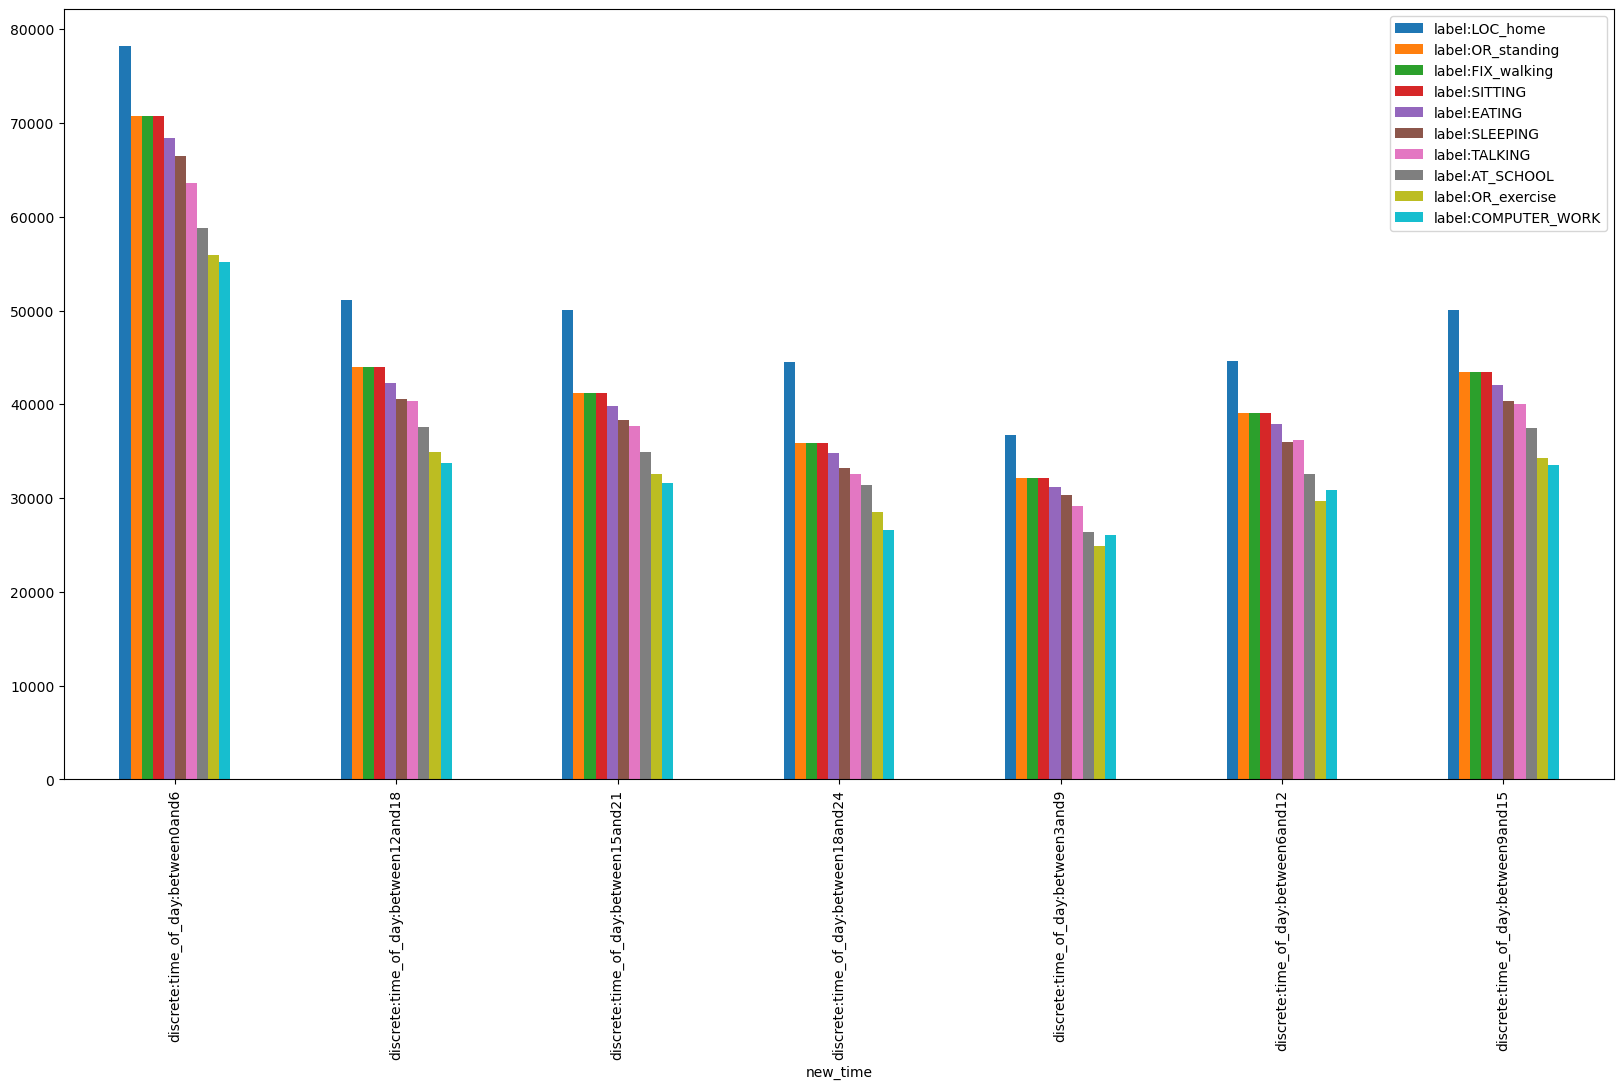

In [164]:
h.plot(kind='bar',figsize=(20,10))

##### From the above graph it can be seen that 0 to 6 is the most active time for most users when considering our current labels followed by 12 to 18 and 9 to 15

In [166]:
features

timestamp  raw_acc:magnitude_stats:mean  raw_acc:magnitude_stats:std  \
0     1444079161                      0.996815                     0.003529   
1     1444079221                      0.996864                     0.004172   
2     1444079281                      0.996825                     0.003667   
3     1444079341                      0.996874                     0.003541   
4     1444079431                      0.997371                     0.037653   
...          ...                           ...                          ...   
4968  1444234779                      1.007886                     0.009355   
4969  1444234839                      1.000400                     0.009068   
4970  1444234899                      1.026223                     0.195112   
4971  1444234959                      1.123513                     0.273450   
4972  1444235019                      1.020624                     0.135672   

      raw_acc:magnitude_stats:moment3  raw_acc:magnitude_stats:moment4  \
0                           -0.002786                         0.006496   
1                           -0.003110                         0.007050   
2                            0.003094                         0.006076   
3                            0.000626                         0.006059   
4                            0.043389                         0.102332   
...                               ...                              ...   
4968                         0.012618                         0.030905   
4969                        -0.019631                         0.032762   
4970                         0.255240                         0.379733   
4971                         0.312818                         0.480787   
4972                         0.104091                         0.185868   

      raw_acc:magnitude_stats:percentile25  \
0                                 0.995203   
1                                 0.994957   
2                                 0.994797   
3                                 0.995050   
4                                 0.995548   
...                                    ...   
4968                              1.005121   
4969                              0.998186   
4970                              0.983684   
4971                              0.966631   
4972                              0.915936   

      raw_acc:magnitude_stats:percentile50  \
0                                 0.996825   
1                                 0.996981   
2                                 0.996614   
3                                 0.996907   
4                                 0.996860   
...                                    ...   
4968                              1.008012   
4969                              1.001128   
4970                              1.000173   
4971                              1.051232   
4972                              1.018161   

      raw_acc:magnitude_stats:percentile75  \
0                                 0.998502   
1                                 0.998766   
2                                 0.998704   
3                                 0.998690   
4                                 0.998205   
...                                    ...   
4968                              1.010024   
4969                              1.003113   
4970                              1.030232   
4971                              1.229708   
4972                              1.115126   

      raw_acc:magnitude_stats:value_entropy  \
0                                  1.748756   
1                                  1.935573   
2                                  2.031780   
3                                  1.865318   
4                                  0.460806   
...                                     ...   
4968                               0.423861   
4969                               0.768680   
4970                               1.484173   
4971                               1.808

In [165]:
labels

label:LOC_home  label:OR_standing  label:FIX_walking  label:SITTING  \
0                0.0                0.0                0.0            1.0   
1                0.0                0.0                0.0            1.0   
2                0.0                0.0                0.0            1.0   
3                0.0                0.0                0.0            1.0   
4                0.0                0.0                0.0            1.0   
...              ...                ...                ...            ...   
4968             NaN                NaN                NaN            NaN   
4969             NaN                NaN                NaN            NaN   
4970             NaN                NaN                NaN            NaN   
4971             NaN                NaN                NaN            NaN   
4972             NaN                NaN                NaN            NaN   

      label:EATING  label:SLEEPING  label:TALKING  label:AT_SCHOOL  \
0              0.0             0.0            NaN              NaN   
1              0.0             0.0            NaN              NaN   
2              0.0             0.0            NaN              NaN   
3              0.0             0.0            NaN              NaN   
4              0.0             0.0            NaN              NaN   
...            ...             ...            ...              ...   
4968           NaN             NaN            NaN              NaN   
4969           NaN             NaN            NaN              NaN   
4970           NaN             NaN            NaN              NaN   
4971           NaN             NaN            NaN              NaN   
4972           NaN             NaN            NaN              NaN   

      label:OR_exercise  label:COMPUTER_WORK  \
0                   NaN                  0.0   
1                   NaN                  0.0   
2                   NaN                  0.0   
3                   NaN                  0.0   
4                   NaN                  0.0   
...                 ...                  ...   
4968                NaN                  NaN   
4969                NaN                  NaN   
4970                NaN                  NaN   
4971                NaN                  NaN   
4972                NaN                  NaN   

                                new_time  
0     discrete:time_of_day:between9and15  
1     discrete:time_of_day:between9and15  
2     discrete:time_of_day:between9and15  
3     discrete:time_of_day:between9and15  
4     discrete:time_of_day:between9and15  
...                                  ...  
4968  discrete:time_of_day:between6and12  
4969  discrete:time_of_day:between6and12  
4970  discrete:time_of_day:between6and12  
4971  discrete:time_of_day:between6and12  
4972  discrete:time_of_day:between6and12  

[377346 rows x 11 columns]

Drop the time column

In [168]:
labels = labels.iloc[:, :-1]

In [169]:
labels

label:LOC_home  label:OR_standing  label:FIX_walking  label:SITTING  \
0                0.0                0.0                0.0            1.0   
1                0.0                0.0                0.0            1.0   
2                0.0                0.0                0.0            1.0   
3                0.0                0.0                0.0            1.0   
4                0.0                0.0                0.0            1.0   
...              ...                ...                ...            ...   
4968             NaN                NaN                NaN            NaN   
4969             NaN                NaN                NaN            NaN   
4970             NaN                NaN                NaN            NaN   
4971             NaN                NaN                NaN            NaN   
4972             NaN                NaN                NaN            NaN   

      label:EATING  label:SLEEPING  label:TALKING  label:AT_SCHOOL  \
0              0.0             0.0            NaN              NaN   
1              0.0             0.0            NaN              NaN   
2              0.0             0.0            NaN              NaN   
3              0.0             0.0            NaN              NaN   
4              0.0             0.0            NaN              NaN   
...            ...             ...            ...              ...   
4968           NaN             NaN            NaN              NaN   
4969           NaN             NaN            NaN              NaN   
4970           NaN             NaN            NaN              NaN   
4971           NaN             NaN            NaN              NaN   
4972           NaN             NaN            NaN              NaN   

      label:OR_exercise  label:COMPUTER_WORK  
0                   NaN                  0.0  
1                   NaN                  0.0  
2                   NaN                  0.0  
3                   NaN                  0.0  
4                   NaN                  0.0  
...                 ...                  ...  
4968                NaN                  NaN  
4969                NaN                  NaN  
4970                NaN                  NaN  
4971                NaN                  NaN  
4972                NaN                  NaN  

[377346 rows x 10 columns]

Create a new dataframe with the new features and labels

In [170]:
data = pd.concat([features,labels],axis=1)
data

timestamp  raw_acc:magnitude_stats:mean  raw_acc:magnitude_stats:std  \
0     1444079161                      0.996815                     0.003529   
1     1444079221                      0.996864                     0.004172   
2     1444079281                      0.996825                     0.003667   
3     1444079341                      0.996874                     0.003541   
4     1444079431                      0.997371                     0.037653   
...          ...                           ...                          ...   
4968  1444234779                      1.007886                     0.009355   
4969  1444234839                      1.000400                     0.009068   
4970  1444234899                      1.026223                     0.195112   
4971  1444234959                      1.123513                     0.273450   
4972  1444235019                      1.020624                     0.135672   

      raw_acc:magnitude_stats:moment3  raw_acc:magnitude_stats:moment4  \
0                           -0.002786                         0.006496   
1                           -0.003110                         0.007050   
2                            0.003094                         0.006076   
3                            0.000626                         0.006059   
4                            0.043389                         0.102332   
...                               ...                              ...   
4968                         0.012618                         0.030905   
4969                        -0.019631                         0.032762   
4970                         0.255240                         0.379733   
4971                         0.312818                         0.480787   
4972                         0.104091                         0.185868   

      raw_acc:magnitude_stats:percentile25  \
0                                 0.995203   
1                                 0.994957   
2                                 0.994797   
3                                 0.995050   
4                                 0.995548   
...                                    ...   
4968                              1.005121   
4969                              0.998186   
4970                              0.983684   
4971                              0.966631   
4972                              0.915936   

      raw_acc:magnitude_stats:percentile50  \
0                                 0.996825   
1                                 0.996981   
2                                 0.996614   
3                                 0.996907   
4                                 0.996860   
...                                    ...   
4968                              1.008012   
4969                              1.001128   
4970                              1.000173   
4971                              1.051232   
4972                              1.018161   

      raw_acc:magnitude_stats:percentile75  \
0                                 0.998502   
1                                 0.998766   
2                                 0.998704   
3                                 0.998690   
4                                 0.998205   
...                                    ...   
4968                              1.010024   
4969                              1.003113   
4970                              1.030232   
4971                              1.229708   
4972                              1.115126   

      raw_acc:magnitude_stats:value_entropy  \
0                                  1.748756   
1                                  1.935573   
2                                  2.031780   
3                                  1.865318   
4                                  0.460806   
...                                     ...   
4968                               0.423861   
4969                               0.768680   
4970                               1.484173   
4971                               1.808

### Check the correlation between the features and the labels 

In [171]:
corr = data.corr()
corr

timestamp  raw_acc:magnitude_stats:mean  \
timestamp                         1.000000                      0.022776   
raw_acc:magnitude_stats:mean      0.022776                      1.000000   
raw_acc:magnitude_stats:std      -0.010497                      0.319747   
raw_acc:magnitude_stats:moment3  -0.022531                      0.267561   
raw_acc:magnitude_stats:moment4  -0.018972                      0.279616   
...                                    ...                           ...   
label:SLEEPING                   -0.052550                     -0.082045   
label:TALKING                     0.123735                      0.027712   
label:AT_SCHOOL                   0.050719                      0.030394   
label:OR_exercise                 0.033698                      0.142175   
label:COMPUTER_WORK              -0.058880                     -0.035921   

                                 raw_acc:magnitude_stats:std  \
timestamp                                          -0.010497   
raw_acc:magnitude_stats:mean                        0.319747   
raw_acc:magnitude_stats:std                         1.000000   
raw_acc:magnitude_stats:moment3                     0.903542   
raw_acc:magnitude_stats:moment4                     0.946682   
...                                                      ...   
label:SLEEPING                                     -0.212169   
label:TALKING                                       0.097806   
label:AT_SCHOOL                                     0.062413   
label:OR_exercise                                   0.234834   
label:COMPUTER_WORK                                -0.098027   

                                 raw_acc:magnitude_stats:moment3  \
timestamp                                              -0.022531   
raw_acc:magnitude_stats:mean                            0.267561   
raw_acc:magnitude_stats:std                             0.903542   
raw_acc:magnitude_stats:moment3                         1.000000   
raw_acc:magnitude_stats:moment4                         0.957933   
...                                                          ...   
label:SLEEPING                                         -0.180086   
label:TALKING                                           0.083142   
label:AT_SCHOOL                                         0.056405   
label:OR_exercise                                       0.175118   
label:COMPUTER_WORK                                    -0.082499   

                                 raw_acc:magnitude_stats:moment4  \
timestamp                                              -0.018972   
raw_acc:magnitude_stats:mean                            0.279616   
raw_acc:magnitude_stats:std                             0.946682   
raw_acc:magnitude_stats:moment3                         0.957933   
raw_acc:magnitude_stats:moment4                         1.000000   
...                                                          ...   
label:SLEEPING                                         -0.221419   
label:TALKING                                           0.098892   
label:AT_SCHOOL                                         0.062979   
label:OR_exercise                                       0.205471   
label:COMPUTER_WORK                                    -0.091590   

                                 raw_acc:magnitude_stats:percentile25  \
timestamp                                                    0.021232   
raw_acc:magnitude_stats:mean                                 0.722769   
raw_acc:magnitude_stats:std                                 -0.380095   
raw_acc:magnitude_stats:moment3                             -0.302338   
raw_acc:magnitude_stats:moment4                             -0.320601   
...                                                               ...   
label:SLEEPING                                               0.144419   
label:TALKING                                               -0.040784   
label:AT_SCHOOL                                             

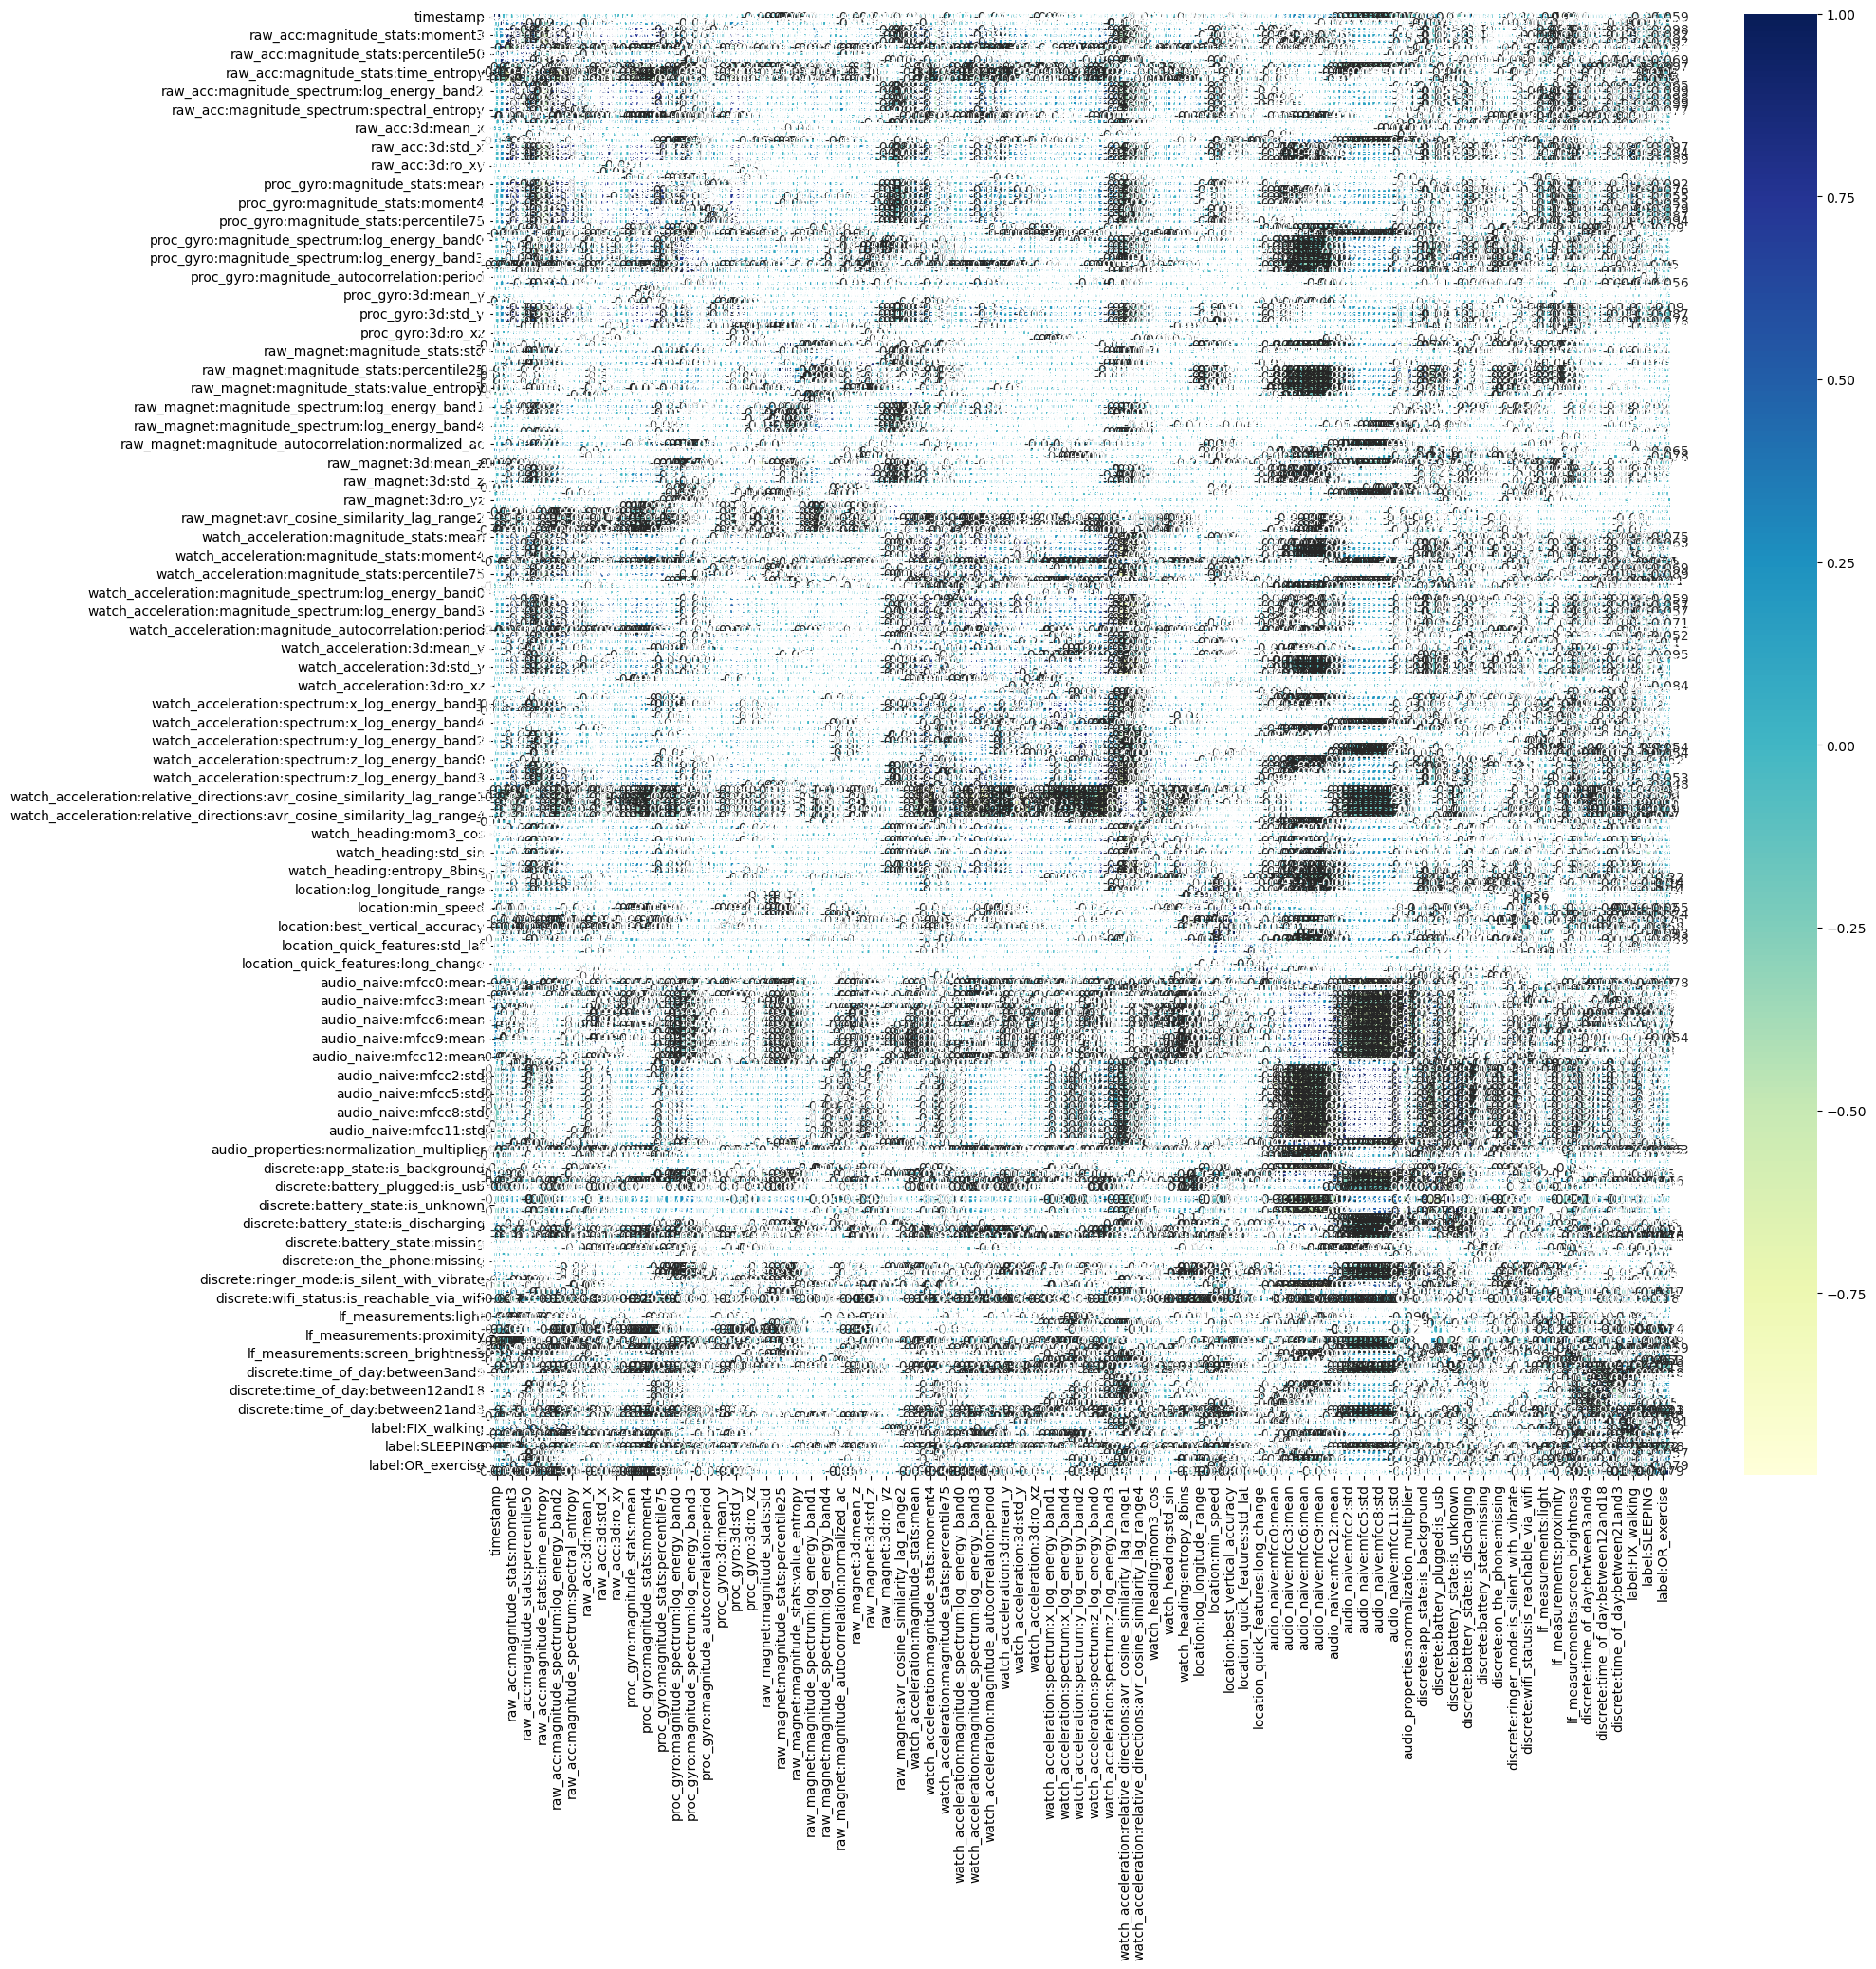

In [186]:
plt.figure(figsize=(20,20))
dataplot = sb.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

#### Due to the large size of the dataset the heatmap data is a bit squeezed but judging from the lack of deep blue it is apparent that correlation between the current features and labels is not very strong

In [200]:
home = roc.sort_values(by =['label:LOC_home'], ascending=False)
home

label:LOC_home  \
label:LOC_home                                            1.000000   
label:LYING_DOWN                                          0.446101   
label:OR_indoors                                          0.404326   
label:PHONE_ON_TABLE                                      0.384200   
label:SLEEPING                                            0.383691   
discrete:time_of_day:between0and6                         0.280100   
discrete:wifi_status:is_reachable_via_wifi                0.257475   
discrete:time_of_day:between21and3                        0.249369   
lf_measurements:relative_humidity                         0.204717   
discrete:battery_state:is_full                            0.199449   
discrete:time_of_day:between3and9                         0.192416   
watch_acceleration:relative_directions:avr_cosi...        0.166697   
audio_properties:normalization_multiplier                 0.166297   
watch_acceleration:relative_directions:avr_cosi...        0.164014   
watch_acceleration:relative_directions:avr_cosi...        0.157900   
location:num_valid_updates                                0.154811   
watch_acceleration:relative_directions:avr_cosi...        0.154367   
raw_acc:magnitude_stats:value_entropy                     0.152868   
watch_acceleration:relative_directions:avr_cosi...        0.152800   
raw_acc:magnitude_stats:time_entropy                      0.136689   
lf_measurements:battery_level                             0.135530   
watch_acceleration:magnitude_stats:percentile25           0.127266   
discrete:battery_state:is_charging                        0.118360   
label_source                                              0.117094   
watch_acceleration:magnitude_autocorrelation:pe...        0.102602   
raw_acc:magnitude_spectrum:log_energy_band0               0.101882   
label:WATCHING_TV                                         0.101872   
audio_naive:mfcc5:mean                                    0.100213   
label:COOKING                                             0.095934   
raw_acc:magnitude_autocorrelation:period                  0.095475   
label:GROOMING                                            0.091634   
raw_acc:magnitude_stats:percentile25                      0.091422   
audio_naive:mfcc11:mean                                   0.090115   
watch_acceleration:spectrum:y_log_energy_band4            0.086523   
audio_naive:mfcc7:mean                                    0.082054   
label:WASHING_DISHES                                      0.079733   
raw_magnet:avr_cosine_similarity_lag_range4               0.073326   
proc_gyro:magnitude_stats:time_entropy                    0.070111   
label:SURFING_THE_INTERNET                                0.069931   
discrete:app_state:is_background                          0.069561   
proc_gyro:magnitude_spectrum:log_energy_band4             0.068348   
label:DOING_LAUNDRY                                       0.068089   
label:DRESSING                                            0.067221   
discrete:battery_plugged:is_usb                           0.065207   
discrete:ringer_mode:missing                              0.064719   
watch_acceleration:magnitude_stats:value_entropy          0.063933   
raw_magnet:magnitude_stats:time_entropy                   0.062929   
proc_gyro:magnitude_stats:value_entropy                   0.060187   
label:BATHING_-_SHOWER                                    0.058992   
watch_acceleration:spectrum:x_log_energy_band4            0.058537   
watch_acceleration:spectrum:y_log_energy_band3            0.057746   
label:CLEANING                                            0.055223   
audio_naive:mfcc9:mean                                    0.050420   
raw_magnet:avr_cosine_similarity_lag_range3               0.045647   
raw_magnet:avr_cosine_similarity_lag_range2               0.044955   
discrete:battery_plugged:is_ac                            0.044921   
audio_naive:mfcc0:mean                                    0.04

#### Predict Loc_home as an individual feature

In [181]:
home_data = pd.concat([features,labels['label:LOC_home']],axis=1)

In [189]:
home_corr =home_data.corrwith(home_data['label:LOC_home'])

In [187]:
home_corr =home_corr.to_list()
print(home_corr)

[0.01867101016722404, -0.055518131595427476, -0.22083031258593588, -0.1723836816624494, -0.2073257044627314, 0.09142189246849411, -0.028395080990592937, -0.13320518407890694, 0.15286838165371655, 0.1366888265794974, 0.1018820060591222, -0.14184640371828489, -0.2149813808336171, -0.21315881740090287, -0.22525164915395965, -0.1695588936102904, 0.09547471542839492, -0.1021451330323695, 0.026127946718277083, -0.006262416189960955, 0.00204927968509994, -0.212177692684442, -0.19919981210785778, -0.19765768280424956, -0.005431634486425992, 0.002327106831005046, -0.02024887601245778, -0.17322041312386965, -0.18122292273085897, -0.15003949977385872, -0.15237705934312765, -0.12443967311180905, -0.15607032148471356, -0.1787788902727533, 0.06018679047413466, 0.07011105386971937, -0.14474110468927012, -0.194605955260766, -0.17301892767687982, -0.10509642252520365, 0.06834761214124091, -0.08295071520063349, -0.0014005330398663878, -0.07768399457258639, -0.0044379192047128415, -0.010210467786959597, 

In [190]:
home_corr=home_corr.to_frame()

In [191]:
home_corr[0]=home_corr[0].abs()

In [192]:
home_corr

0
timestamp                            0.018671
raw_acc:magnitude_stats:mean         0.055518
raw_acc:magnitude_stats:std          0.220830
raw_acc:magnitude_stats:moment3      0.172384
raw_acc:magnitude_stats:moment4      0.207326
...                                       ...
discrete:time_of_day:between12and18  0.238090
discrete:time_of_day:between15and21  0.141327
discrete:time_of_day:between18and24  0.040366
discrete:time_of_day:between21and3   0.249369
label:LOC_home                       1.000000

[227 rows x 1 columns]

<AxesSubplot:>

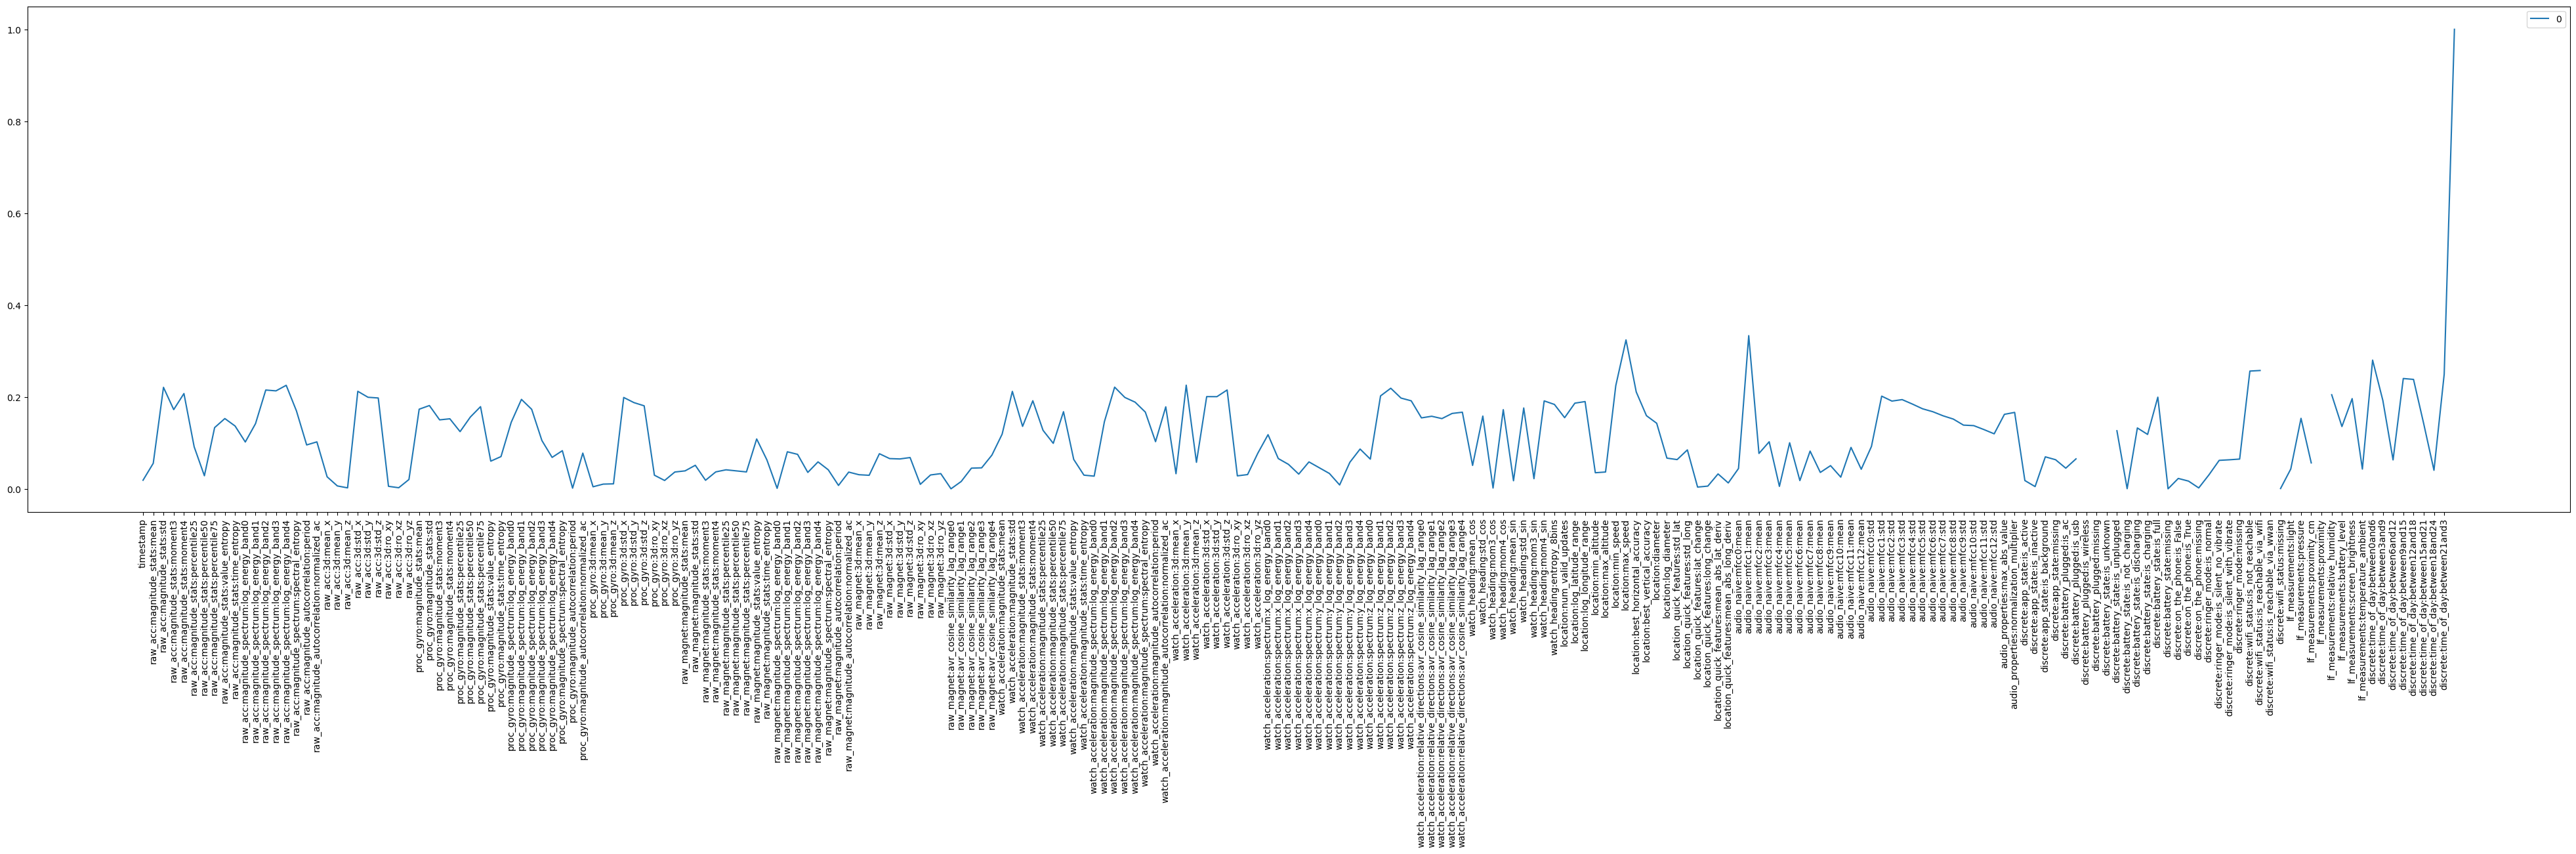

In [200]:
home_corr.plot(kind= 'line',rot=90,figsize=(50,10),xticks=[ascii for ascii in range(len(home_data.columns[1:])) ])

#### Once again the above lineplot shows the lack of correlation  In other to mitigate null values we will use the top  features for our preliminary analysis

In [201]:
home_corr = home_corr.sort_values(by =[0], ascending=False)
home_corr[:16]

0
label:LOC_home                                      1.000000
audio_naive:mfcc1:mean                              0.333306
location:max_speed                                  0.324094
discrete:time_of_day:between0and6                   0.280100
discrete:wifi_status:is_reachable_via_wifi          0.257475
discrete:wifi_status:is_not_reachable               0.256210
discrete:time_of_day:between21and3                  0.249369
discrete:time_of_day:between9and15                  0.240034
discrete:time_of_day:between12and18                 0.238090
watch_acceleration:3d:mean_y                        0.225493
raw_acc:magnitude_spectrum:log_energy_band4         0.225252
location:min_speed                                  0.224422
watch_acceleration:magnitude_spectrum:log_energ...  0.221244
raw_acc:magnitude_stats:std                         0.220830
watch_acceleration:spectrum:z_log_energy_band2      0.218850
watch_acceleration:3d:std_z                         0.215065

In [277]:
home_corr.iloc[:,0]

label:LOC_home                                                             1.000000
audio_naive:mfcc1:mean                                                     0.333306
location:max_speed                                                         0.324094
discrete:time_of_day:between0and6                                          0.280100
discrete:wifi_status:is_reachable_via_wifi                                 0.257475
discrete:wifi_status:is_not_reachable                                      0.256210
discrete:time_of_day:between21and3                                         0.249369
discrete:time_of_day:between9and15                                         0.240034
discrete:time_of_day:between12and18                                        0.238090
watch_acceleration:3d:mean_y                                               0.225493
raw_acc:magnitude_spectrum:log_energy_band4                                0.225252
location:min_speed                                                         0

In [202]:
home_fea= features[['audio_naive:mfcc1:mean','location:max_speed','discrete:time_of_day:between0and6','discrete:wifi_status:is_reachable_via_wifi','discrete:wifi_status:is_not_reachable','discrete:time_of_day:between21and3','discrete:time_of_day:between9and15','discrete:time_of_day:between12and18','watch_acceleration:3d:mean_y','raw_acc:magnitude_spectrum:log_energy_band4','location:min_speed','watch_acceleration:magnitude_spectrum:log_energy_band2','raw_acc:magnitude_stats:std','watch_acceleration:spectrum:z_log_energy_band2','watch_acceleration:3d:std_z','raw_acc:magnitude_spectrum:log_energy_band2']]

In [203]:
home_fea = pd.concat([features[['audio_naive:mfcc1:mean','location:max_speed','discrete:time_of_day:between0and6','discrete:wifi_status:is_reachable_via_wifi','discrete:wifi_status:is_not_reachable','discrete:time_of_day:between21and3','discrete:time_of_day:between9and15','discrete:time_of_day:between12and18','watch_acceleration:3d:mean_y','raw_acc:magnitude_spectrum:log_energy_band4','location:min_speed','watch_acceleration:magnitude_spectrum:log_energy_band2','raw_acc:magnitude_stats:std','watch_acceleration:spectrum:z_log_energy_band2','watch_acceleration:3d:std_z','raw_acc:magnitude_spectrum:log_energy_band2']],labels['label:LOC_home']],axis=1)

In [204]:
home_fea.isna().sum()

audio_naive:mfcc1:mean                                      9594
location:max_speed                                        272817
discrete:time_of_day:between0and6                              0
discrete:wifi_status:is_reachable_via_wifi                     0
discrete:wifi_status:is_not_reachable                          0
discrete:time_of_day:between21and3                             0
discrete:time_of_day:between9and15                             0
discrete:time_of_day:between12and18                            0
watch_acceleration:3d:mean_y                              132544
raw_acc:magnitude_spectrum:log_energy_band4                  290
location:min_speed                                        272817
watch_acceleration:magnitude_spectrum:log_energy_band2    132544
raw_acc:magnitude_stats:std                                  290
watch_acceleration:spectrum:z_log_energy_band2            132544
watch_acceleration:3d:std_z                               132544
raw_acc:magnitude_spectru

#### Drop null values

In [205]:
home_final = home_fea
home_final =home_te.dropna()
home_final

audio_naive:mfcc1:mean  location:max_speed  \
159                 0.717605                0.44   
160                 0.793143                2.73   
168                 0.013480                2.32   
169                 0.521008                1.93   
170                -0.483683                1.29   
...                      ...                 ...   
2261               -0.956735                3.75   
2262               -0.822229                4.00   
2263               -0.362770                4.50   
2264                0.821539                0.50   
2265                0.456133                5.50   

      discrete:time_of_day:between0and6  \
159                                 0.0   
160                                 0.0   
168                                 0.0   
169                                 0.0   
170                                 0.0   
...                                 ...   
2261                                0.0   
2262                                0.0   
2263                                0.0   
2264                                0.0   
2265                                0.0   

      discrete:wifi_status:is_reachable_via_wifi  \
159                                          0.0   
160                                          1.0   
168                                          1.0   
169                                          1.0   
170                                          0.0   
...                                          ...   
2261                                         0.0   
2262                                         0.0   
2263                                         0.0   
2264                                         0.0   
2265                                         0.0   

      discrete:wifi_status:is_not_reachable  \
159                                     1.0   
160                                     0.0   
168                                     0.0   
169                                     0.0   
170                                     1.0   
...                                     ...   
2261                                    1.0   
2262                                    1.0   
2263                                    1.0   
2264                                    1.0   
2265                                    1.0   

      discrete:time_of_day:between21and3  discrete:time_of_day:between9and15  \
159                                  0.0                                 0.0   
160                                  0.0                                 0.0   
168                                  0.0                                 0.0   
169                                  0.0                                 0.0   
170                                  0.0                                 0.0   
...                                  ...                                 ...   
2261                                 0.0                                 0.0   
2262                                 0.0                                 0.0   
2263                                 0.0                                 0.0   
2264                                 0.0                                 0.0   
2265                                 0.0                                 0.0   

      discrete:time_of_day:between12and18  watch_acceleration:3d:mean_y  \
159                                   1.0                    347.648000   
160                                   1.0                    409.136000   
168                                   1.0                    475.248000   
169                                   1.0                    453.936000   
170                                   1.0                    472.784000   
...                                   ...                           ...   
2261                                  0.0                    561.664000   
2262                                  0.0                    546.584615   
2263                                  

### Split the data into training and testing data

In [206]:
X_train, X_test, y_train, y_test = train_test_split(home_final[['audio_naive:mfcc1:mean','location:max_speed','discrete:time_of_day:between0and6','discrete:wifi_status:is_reachable_via_wifi','discrete:wifi_status:is_not_reachable','discrete:time_of_day:between21and3','discrete:time_of_day:between9and15','discrete:time_of_day:between12and18','watch_acceleration:3d:mean_y','raw_acc:magnitude_spectrum:log_energy_band4','location:min_speed','watch_acceleration:magnitude_spectrum:log_energy_band2','raw_acc:magnitude_stats:std','watch_acceleration:spectrum:z_log_energy_band2','watch_acceleration:3d:std_z','raw_acc:magnitude_spectrum:log_energy_band2']], home_final['label:LOC_home'], test_size=0.2)

### Use a decision tree to predict the user being at home

In [209]:
from sklearn import tree

In [318]:
tree_classifier = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf= 10, min_samples_split= 100)
tree_classifier = tree_classifier.fit(X_train,y_train)

In [319]:
tree_prediction = tree_classifier.predict(X_test)

In [320]:
tree_classifier.predict_proba(X_test)

array([[0.61016949, 0.38983051],
       [0.52123552, 0.47876448],
       [0.59349593, 0.40650407],
       ...,
       [0.9122807 , 0.0877193 ],
       [0.59349593, 0.40650407],
       [0.59349593, 0.40650407]])

In [321]:
f1 = f1_score(y_test,tree_prediction)

In [322]:
f1

0.6347455502632239

In [323]:
from sklearn.metrics import classification_report

In [324]:
print(classification_report(y_test,tree_prediction))

              precision    recall  f1-score   support

         0.0       0.70      0.68      0.69      2367
         1.0       0.62      0.65      0.63      1960

    accuracy                           0.66      4327
   macro avg       0.66      0.66      0.66      4327
weighted avg       0.66      0.66      0.66      4327



In [306]:
from sklearn.model_selection import GridSearchCV

In [311]:
params =  {
    'min_samples_leaf': [5, 7, 10],
    'max_depth': [5, 7, 10],
    'min_samples_split': [70,100,120]
}

In [315]:
grid = GridSearchCV(estimator=tree_classifier,
                    param_grid=params,
                    cv=15,
                    n_jobs=3,
                    verbose=2)

In [316]:
grid.fit(X_train,y_train)

Fitting 15 folds for each of 27 candidates, totalling 405 fits


GridSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_jobs=3,
             param_grid={'max_depth': [5, 7, 10],
                         'min_samples_leaf': [5, 7, 10],
                         'min_samples_split': [70, 100, 120]},
             verbose=2)

In [317]:
grid.best_score_, grid.best_params_


(0.6620070817193536,
 {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 100})

### the accuracy peaks around 0.66 while using a decsion tree and our current dataset. Let's try adding another label to see how the model changes